In [928]:
# QUESTION 1

In [927]:
pip install yfinance==0.1.70

In [871]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [872]:
initial_data = yf.download("BNB-USD", start="2021-03-29", end="2022-03-29")

[*********************100%***********************]  1 of 1 completed


In [873]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-28,269.310730,280.992401,262.288666,269.191284,269.191284,2527142069
2021-03-29,268.969391,277.479004,265.367828,275.214630,275.214630,2067448661
2021-03-30,275.238647,311.426483,271.578552,311.426483,311.426483,4039620710
2021-03-31,311.551422,316.486542,289.009277,302.063446,302.063446,3545493416
2021-04-01,302.245483,339.209106,301.588654,335.212891,335.212891,3718677616


In [874]:
data= initial_data['Adj Close']
data.head()

Date
2021-03-28    269.191284
2021-03-29    275.214630
2021-03-30    311.426483
2021-03-31    302.063446
2021-04-01    335.212891
Name: Adj Close, dtype: float64

In [875]:
data.describe().round(2)

count    366.00
mean     440.47
std      101.48
min      261.82
25%      366.57
50%      417.08
75%      520.04
max      675.68
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

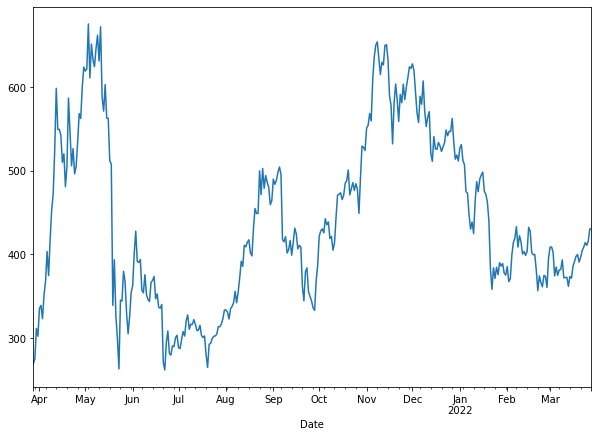

In [876]:
data.plot(figsize=(10,7), subplots = True)

In [877]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1))
# calculating the volatility of the stock

In [878]:
vol = log_return.std() 
# Daily Volatility 
print('The daily volatility is', round(vol*100,2),'%')

The daily volatility is 5.67 %


In [879]:
vol = np.sqrt(365) * log_return.std()
# annualised Volatility 
print('The annualised volatility is', round(vol*100,2),'%')

The annualised volatility is 108.4 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

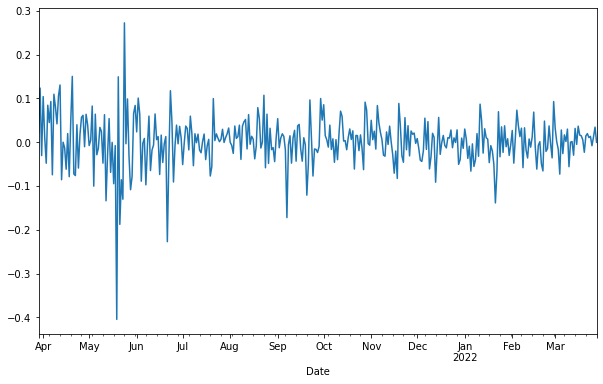

In [880]:
log_return.dropna(inplace=True)
#volatility graph
log_return.plot(subplots=True, figsize=(10, 6))

In [881]:
import numpy as np
import os

In [969]:
#BINOMAL PRICE TREE
#METHODOLOGY

In [882]:
S0 = 430              # spot stock price
K = 500               # strike
T = 1               # maturity 
r = 0.0167               # risk free rate 
sig = 1.08               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [883]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [884]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [885]:
S

array([[ 430.        ,  802.17236154, 1496.46627353, 2791.68345255],
       [   0.        ,  230.4990908 ,  430.        ,  802.17236154],
       [   0.        ,    0.        ,  123.55774619,  230.4990908 ],
       [   0.        ,    0.        ,    0.        ,   66.23243757]])

In [886]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.35317595023688025

In [887]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 269.5009092 ],
       [  0.        ,   0.        ,   0.        , 433.76756243]])

In [888]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[232.92938005, 111.50578713,   0.        ,   0.        ],
       [  0.        , 301.23875836, 173.35198589,   0.        ],
       [  0.        ,   0.        , 373.66665307, 269.5009092 ],
       [  0.        ,   0.        ,   0.        , 433.76756243]])

In [889]:
print('European ' + payoff, str( V[0,0]))

European put 232.9293800504054


In [890]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [891]:
T = 1
r = 0.0167
sigma = 1.08
S0 = 430
N = 100
K = 500

In [892]:
S = mcs_simulation_np(100)

In [893]:
S = np.transpose(S)
S

array([[430.        , 409.50941636, 410.89199031, ..., 192.76404713,
        194.91290713, 174.28204318],
       [430.        , 372.9520228 , 339.55147401, ..., 201.11019687,
        213.76764222, 256.95837182],
       [430.        , 423.32788971, 451.96407354, ...,  64.31523293,
         59.17377421,  51.8690894 ],
       ...,
       [430.        , 406.45364726, 343.67922175, ...,  96.86115361,
         96.3713837 ,  80.68591907],
       [430.        , 424.96117544, 413.10783361, ..., 262.85942418,
        295.89539753, 312.51679319],
       [430.        , 436.34953331, 470.56393529, ..., 432.5245513 ,
        454.54910371, 516.06489507]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

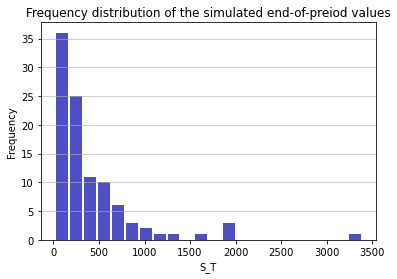

In [894]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [895]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 220.47914667690085


In [896]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 133.16337382675675


In [897]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [898]:
delta(430, 500, 1, 0.0167, 0, 1.084, 'call')

0.6621252845036075

In [899]:
delta(430, 500, 1, 0.0167, 0, 1.084, 'put')

-0.3378747154963925

In [900]:
S = np.linspace(450,550,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 500, 1, 0.0167, 0, 1.084, 'call')
    Delta_Put [i] = delta(S[i], 500, 1, 0.0167, 0, 1.084, 'put')

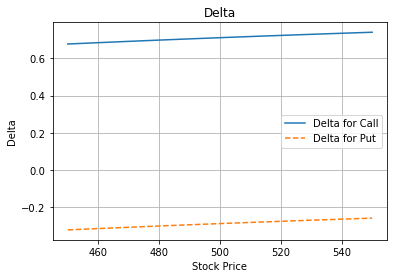

In [901]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [931]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [932]:
gamma(430, 500, 1, 0.0167, 0, 1.08, 'call')

0.0007879037261126808

In [933]:
gamma(430, 500, 1, 0.0167, 0, 1.08, 'put')

0.0007879037261126808

In [953]:
S = np.linspace(0,250,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 500, 1, 0.0167, 0, 1.08, 'call')

C:\Users\jerin\AppData\Local\Temp/ipykernel_7492/716081051.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\jerin\AppData\Local\Temp/ipykernel_7492/716081051.py:4: RuntimeWarning: invalid value encountered in double_scalars
  gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))


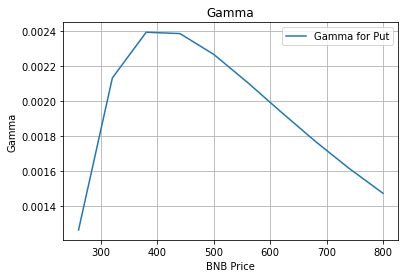

In [968]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('BNB Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [907]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [908]:
speed(430, 500, 1, 0.0167, 0, 1.08, 'put')

-2.5378035271075934e-06

In [956]:
S = np.linspace(200,800,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 500, 1/12, 0.0167, 0, 1.08, 'put')

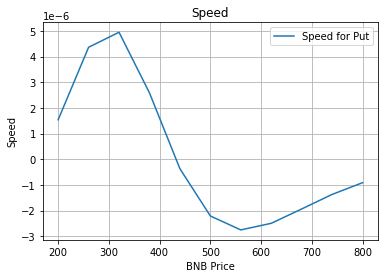

In [957]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('BNB Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [911]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [912]:
theta(430, 500, 1, 0.0167, 0, 1.08, 'call')

87.0424623133576

In [913]:
theta(430, 500, 1, 0.0167, 0, 1.08, 'put')

91.09436714261204

In [914]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(430, 500, T[i], 0.0167, 0, 1.08, 'call')
    Theta_Put [i] = theta(400, 500, T[i], 0.0167, 0, 1.08, 'put')

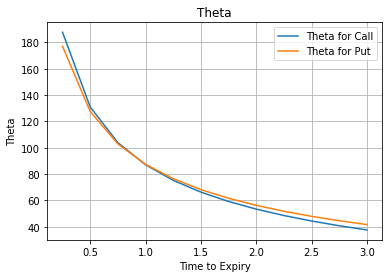

In [915]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [916]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [917]:
rho(430, 500, 1, 0.0167, 0, 1.08, 'call')

124.54515215060633

In [918]:
rho(430, 500, 1, 0.0167, 0, 1.08, 'put')

-367.17418384248884

In [919]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(430, 500, 1, r[i], 0, 1.08, 'call')
    Rho_Put [i] = rho(430, 500, 1, r[i], 0, 1.08, 'put')

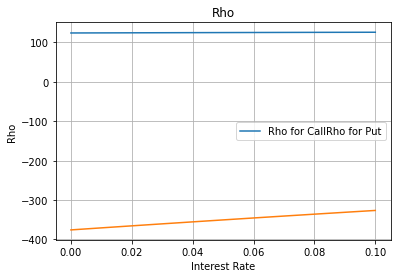

In [967]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call''Rho for Put'])

In [921]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [922]:
vega(430, 500, 1, 0.0167, 0, 1.08, 'call')

157.33807087489348

In [923]:
vega(430, 500, 1, 0.0167, 0, 1.08, 'put')

157.33807087489348

In [958]:
vol = np.linspace(0.1,2,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(430, 500, 1, 0.0167, 0, vol[i], 'call')

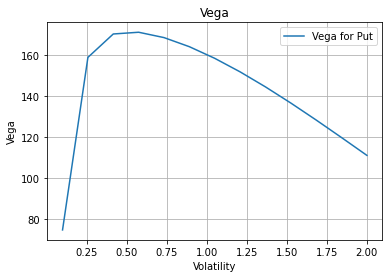

In [960]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])